In [67]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = datasets.load_iris() #Load dataset

In [54]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

In [45]:
X=data[['sepal length', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% tes

In [47]:
clf=RandomForestClassifier(n_estimators=100) #Create a Gaussian Classifier
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
y_pred=clf.predict(X_test)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #check accuracy

Accuracy: 0.9777777777777777


In [63]:
clf.predict([[2,2,666]])

array([0])

In [64]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

ValueError: Length of passed values is 3, index implies 4

In [56]:
feature_imp

petal width (cm)     0.464866
petal length (cm)    0.402609
sepal length (cm)    0.095342
sepal width (cm)     0.037183
dtype: float64

In [65]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

No handles with labels found to put in legend.


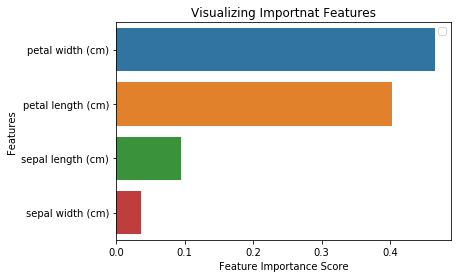

In [66]:
sns.barplot(x=feature_imp,y=feature_imp.index) #creates a barplot
plt.xlabel("Feature Importance Score") #add feature names to graphs
plt.ylabel("Features")
plt.title("Visualizing Importnat Features")
plt.legend()
plt.show()

In [68]:
XX = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])

yy = np.array([-52, -54, -31, -16, 38, -7, 70, 55, -35, 32])

In [74]:
regress = DecisionTreeRegressor(max_depth=1)
print(XX.reshape(-1, 1))
print([[i, j] for (i, j) in zip(XX, yy)])
regress.fit(XX.reshape(-1, 1), yy.reshape(-1, 1))

[[ 5]
 [ 7]
 [12]
 [23]
 [25]
 [28]
 [29]
 [34]
 [35]
 [40]]
[[5, -52], [7, -54], [12, -31], [23, -16], [25, 38], [28, -7], [29, 70], [34, 55], [35, -35], [40, 32]]


DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
dot_data = export_graphviz(regress, out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data) # Draw graph
graph.write_png('reg_tree.png')

True